In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

electricity_data_to_load = "Resources/complete_dataset.csv"
electricity_data = pd.read_csv(electricity_data_to_load)
electricity_data.head(2)

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.03,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.01,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N


In [2]:
electricity_data_df = electricity_data.rename(columns={"date":"Date", "demand":"Demand (MWh)", "RRP": "RRP (AUD/MWh)",
                                                       "min_temperature":"Min Temperature", "max_temperature":"Max temperature",
                                                       "solar_exposure":"Total Sunlight Energy (MJ/m^2)", "rainfall": "Rainfall (mm)",
                                                      "school_day":"School Day", "holiday":"Holiday"})
electricity_data_df.head(2)

,Date,Demand (MWh),RRP (AUD/MWh),demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,Min Temperature,Max temperature,Total Sunlight Energy (MJ/m^2),Rainfall (mm),School Day,Holiday
0,2015-01-01,99635.03,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.01,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N


In [3]:
electricity_data_clean = electricity_data_df.drop(electricity_data_df.columns[[3,4,5,6,7]],axis=1)

In [4]:
#Dropping rows with missing values
electricity_data_clean = electricity_data_clean.dropna()

In [5]:
electricity_data.head()

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


In [55]:
#Removing rows with large price outliers
electricity_data_clean.sort_values("RRP (AUD/MWh)").tail(20)
electricity_data_clean = electricity_data_clean.loc[electricity_data_clean["RRP (AUD/MWh)"] <= 200, :]

,Date,Demand (MWh),RRP (AUD/MWh),Min Temperature,Max temperature,Total Sunlight Energy (MJ/m^2),Rainfall (mm),School Day,Holiday
1743,2019-10-10,123692.080,167.981136,10.2,14.7,12.6,0.2,Y,N
517,2016-06-01,141195.030,168.852759,4.8,17.0,8.2,0.0,Y,N
945,2017-08-03,151355.430,169.233827,3.1,9.0,4.4,0.0,Y,N
861,2017-05-11,128753.130,170.292645,6.1,16.5,8.6,0.0,Y,N
1477,2019-01-17,145211.490,175.352893,20.7,32.5,6.0,0.0,N,N
519,2016-06-03,137717.255,175.854630,6.8,14.1,8.5,0.0,Y,N
1481,2019-01-21,130517.970,176.689950,18.4,25.1,28.2,0.0,N,N
553,2016-07-07,138768.045,176.912036,10.5,13.7,4.1,3.8,N,N
1436,2018-12-07,156648.405,177.861817,25.1,38.0,27.1,0.0,Y,N
1476,2019-01-16,136971.755,178.079675,19.8,26.7,17.5,0.0,N,N


In [6]:
electricity_data_clean.count()

Date                              2102
Demand (MWh)                      2102
RRP (AUD/MWh)                     2102
Min Temperature                   2102
Max temperature                   2102
Total Sunlight Energy (MJ/m^2)    2102
Rainfall (mm)                     2102
School Day                        2102
Holiday                           2102
dtype: int64

In [14]:
electricity_data_clean["Max temperature"].max()

43.5

In [15]:
electricity_data_clean["Max temperature"].mean()

20.41555661274976

In [7]:
max_temp_demand_df = electricity_data_clean[["Date", "Demand (MWh)", "Max temperature"]]
max_temp_demand_df.head()

,Date,Demand (MWh),Max temperature
0,2015-01-01,99635.030,26.9
1,2015-01-02,129606.010,38.8
2,2015-01-03,142300.540,38.2
3,2015-01-04,104330.715,21.4
4,2015-01-05,118132.200,22.0


In [17]:
df1 = max_temp_demand_df.loc[max_temp_demand_df["Max temperature"] <= 24, [
    "Date", "Demand (MWh)", "Max temperature"]]
df1

,Date,Demand (MWh),Max temperature
3,2015-01-04,104330.715,21.4
4,2015-01-05,118132.200,22.0
8,2015-01-09,121801.155,18.0
9,2015-01-10,103043.660,21.7
13,2015-01-14,119741.620,22.7
...,...,...,...
2098,2020-09-29,112076.460,21.0
2099,2020-09-30,113620.210,19.4
2100,2020-10-01,106641.790,19.5
2104,2020-10-05,113610.030,12.7


In [21]:
df2 = max_temp_demand_df.loc[max_temp_demand_df["Max temperature"] > 24, [
    "Date", "Demand (MWh)", "Max temperature"]]
df2

,Date,Demand (MWh),Max temperature
0,2015-01-01,99635.030,26.9
1,2015-01-02,129606.010,38.8
2,2015-01-03,142300.540,38.2
5,2015-01-06,130672.485,26.0
6,2015-01-07,153514.820,37.4
...,...,...,...
1914,2020-03-29,95953.205,26.4
2088,2020-09-19,93384.000,26.3
2101,2020-10-02,99585.835,26.0
2102,2020-10-03,92277.025,29.4


The p-value is: 1.5979731140191782e-147
The r-value is: -0.5874775434875742


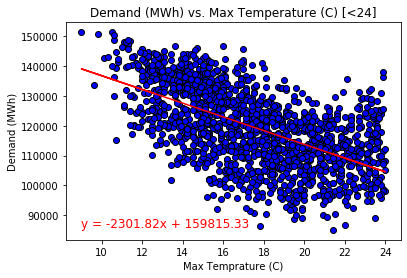

In [33]:
# Plot 1: Max Temperature (<24) vs. Demand
x_values = df1 ["Max temperature"]
y_values = df1 ["Demand (MWh)"]

plt.scatter(x_values,y_values, marker = "o", facecolor = "blue", edgecolor="black")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (9, 86000), fontsize=12,color="red")
plt.xlabel("Max Temprature (C)")
plt.ylabel("Demand (MWh)")
plt.title("Demand (MWh) vs. Max Temperature (C) [<24]")
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")
plt.show()

As the r-value is -0.587 we can say that the Max Temperature and the Demand have a strong negative association.

The p-value is: 3.8064065380340385e-49
The r-value is: 0.5858405849461376


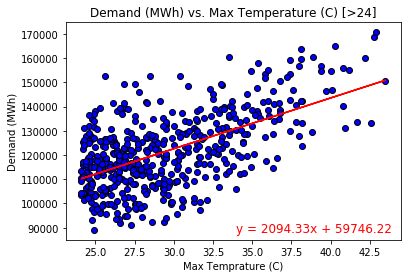

In [37]:
# Plot 2: Max Temperature (>24) vs. Demand
x_values = df2 ["Max temperature"]
y_values = df2 ["Demand (MWh)"]

plt.scatter(x_values,y_values, marker = "o", facecolor = "blue", edgecolor="black")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (34, 88000), fontsize=12,color="red")
plt.xlabel("Max Temprature (C)")
plt.ylabel("Demand (MWh)")
plt.title("Demand (MWh) vs. Max Temperature (C) [>24]")
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")
plt.show()

As the r-value is 0.585 we can say that the Max Temperature and the Demand have a strong possitive association.

In [39]:
schooldays_demand_df = electricity_data_clean[["Date", "Demand (MWh)", "School Day"]]
schooldays_demand_df.head()

,Date,Demand (MWh),School Day
0,2015-01-01,99635.030,N
1,2015-01-02,129606.010,N
2,2015-01-03,142300.540,N
3,2015-01-04,104330.715,N
4,2015-01-05,118132.200,N


In [40]:
df3 = schooldays_demand_df.loc[schooldays_demand_df["School Day"] == "Y", :]
df3

,Date,Demand (MWh),School Day
28,2015-01-29,119313.730,Y
29,2015-01-30,121018.150,Y
30,2015-01-31,103822.970,Y
31,2015-02-01,100178.840,Y
32,2015-02-02,118694.160,Y
...,...,...,...
2037,2020-07-30,132583.640,Y
2038,2020-07-31,132105.750,Y
2039,2020-08-01,111590.650,Y
2040,2020-08-02,109935.335,Y


In [45]:
mean_dy = df3["Demand (MWh)"].mean()
mean_dy

121173.58489648032

In [41]:
df4 = schooldays_demand_df.loc[schooldays_demand_df["School Day"] == "N", :]
df4

,Date,Demand (MWh),School Day
0,2015-01-01,99635.030,N
1,2015-01-02,129606.010,N
2,2015-01-03,142300.540,N
3,2015-01-04,104330.715,N
4,2015-01-05,118132.200,N
...,...,...,...
2101,2020-10-02,99585.835,N
2102,2020-10-03,92277.025,N
2103,2020-10-04,94081.565,N
2104,2020-10-05,113610.030,N


In [46]:
mean_dn = df4["Demand (MWh)"].mean()
mean_dn

117513.02494640122

In [62]:
school_day = ["School Day: 121174 (MWh)", "No School Day: 117513 (MWh)"]
mean = [mean_dy, mean_dn]
colours = ["orange","green"]
title = "Mean demand comparison School Day vs. No School Day"

Text(0.5, 1.0, 'Mean demand comparison School Day vs. No School Day')

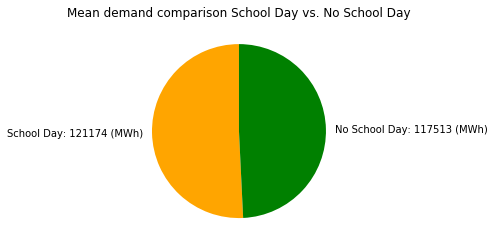

In [63]:
plt.pie(mean, labels=school_day, colors=colours, startangle=90)
plt.title(title)